## Exo 6

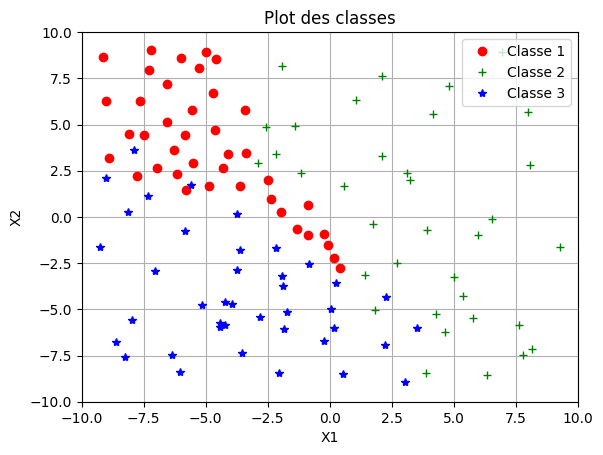

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
from scipy.io import loadmat
import matplotlib.pyplot as plt

X = loadmat('traindata.mat')['X']
# Largeur de bande pour Parzen
h = 0.5
S = np.eye(2) * h**2 # Matrice de covariance pour le noyau gaussien isotrope 2D

plt.figure()
# Filtrer et tracer chaque classe
plt.plot(X[X[:, 2] == 1, 0], X[X[:, 2] == 1, 1], 'or', label='Classe 1')
plt.plot(X[X[:, 2] == 2, 0], X[X[:, 2] == 2, 1], '+g', label='Classe 2')
plt.plot(X[X[:, 2] == 3, 0], X[X[:, 2] == 3, 1], '*b', label='Classe 3')

# Configurer les limites et les options d'affichage
plt.axis([-10, 10, -10, 10])
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.title('Plot des classes')

# Afficher le graphique
plt.show()

On rappelle que $p_f(x) = \frac{1}{Nh^d}\sum_{i=0}^{N}K({\frac{x-x_i}{h}})$ avec $K$ le noyau gaussien et $D$ la dimension (ici $D=2$)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fonction gaussienne définie précédemment
def gaussienne(X, Y, m, S):
    SS = np.linalg.inv(S)
    det_S = np.linalg.det(S)
    Z = (1 / (2 * np.pi * np.sqrt(det_S))) * np.exp(
        -0.5 * (
            (X - m[0])**2 * SS[0, 0] +
            (X - m[0]) * (Y - m[1]) * SS[0, 1] +
            (X - m[0]) * (Y - m[1]) * SS[1, 0] +
            (Y - m[1])**2 * SS[1, 1]
        )
    )
    return Z

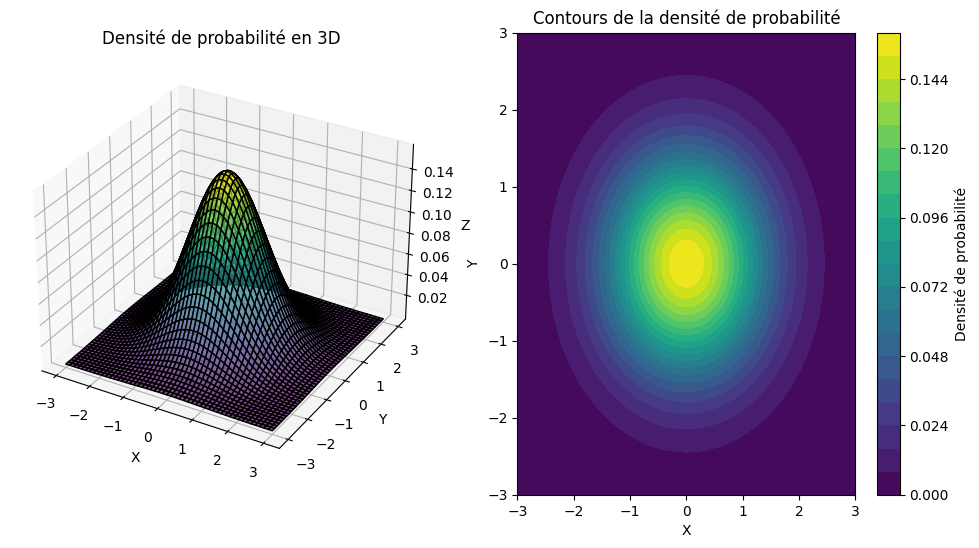

In [12]:
# Paramètres de la distribution gaussienne
m = np.array([0, 0])        # Moyenne
S = np.array([[1, 0],     # Matrice de covariance
              [0, 1]])

# Grille pour X et Y
x_mesh = np.linspace(-3, 3, 1000)
y_mesh = np.linspace(-3, 3, 1000)
X_mesh, Y_mesh = np.meshgrid(x_mesh, y_mesh)
Z_mesh = gaussienne(X_mesh, Y_mesh, m, S)

# Visualisation en surface 3D
fig = plt.figure(figsize=(12, 6))

# Graphique 3D
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X_mesh, Y_mesh, Z_mesh, cmap='viridis', edgecolor='k', alpha=0.7)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Densité de probabilité en 3D')

# Graphique de contours
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X_mesh, Y_mesh, Z_mesh, cmap='viridis', levels=20)
plt.colorbar(contour, ax=ax2, label='Densité de probabilité')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Contours de la densité de probabilité')

plt.show()

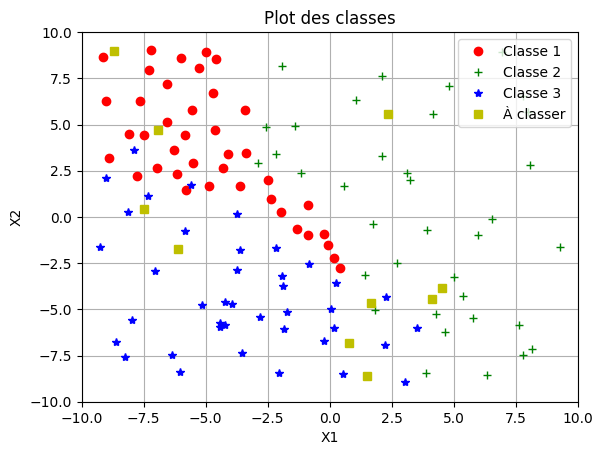

In [19]:
import random

# Génération de points de test 
def genere_test(nb_points, min_x, max_x, min_y, max_y):
    X = np.zeros((nb_points,3))
    for k in range(nb_points):
        X[k,0] = random.uniform(min_x, max_x)
        X[k,1] = random.uniform(min_y, max_y)
    return X

X_test = genere_test(10, -10, 10, -10, 10)

plt.figure()
plt.plot(X[X[:, 2] == 1, 0], X[X[:, 2] == 1, 1], 'or', label='Classe 1')
plt.plot(X[X[:, 2] == 2, 0], X[X[:, 2] == 2, 1], '+g', label='Classe 2')
plt.plot(X[X[:, 2] == 3, 0], X[X[:, 2] == 3, 1], '*b', label='Classe 3')
plt.plot(X_test[:,0], X_test[:,1], 'sy', label='À classer')
# Configurer les limites et les options d'affichage
plt.axis([-10, 10, -10, 10])
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.title('Plot des classes')

plt.show()

In [ ]:
N = X.shape[0]
h = 0.5
S = np.eye(2) * h**2 
m = [0, 0]

n1 = X[X[:,2]==1].shape[0]
n2 = X[X[:,2]==2].shape[0]
n3 = X[X[:,2]==3].shape[0]

pw1 = n1 / N
pw2 = n2 / N
pw3 = n3 / N

X1 = X[X[:,2]==1]
X2 = X[X[:,2]==2]
X3 = X[X[:,2]==3]

for x_test in X_test:
    pf1, pf2, pf3 = 0, 0, 0

    for i in range(X1.shape[0]):
        pf1 += gaussienne((x_test[0] - X1[i, 0])/h, (x_test[1] - X1[i, 1])/h, m, S)
    for i in range(X2.shape[0]):
        pf2 += gaussienne((x_test[0] - X2[i, 0])/h, (x_test[1] - X2[i, 1])/h, m, S)
    for i in range(X3.shape[0]):
        pf3 += gaussienne((x_test[0] - X3[i, 0])/h, (x_test[1] - X3[i, 1])/h, m, S)
        
    pf1 = (1/N*h**2) * pf1
    pf2 = (1/N*h**2) * pf2
    pf3 = (1/N*h**2) * pf3

    g1_x = pw1 * pf1
    g2_x = pw2 * pf2
    g3_x = pw3 * pf3

    x_test[2] = 1 + np.argmax([g1_x, g2_x, g3_x])

[2. 2. 2. 1. 3. 3. 3. 1. 2. 3.]


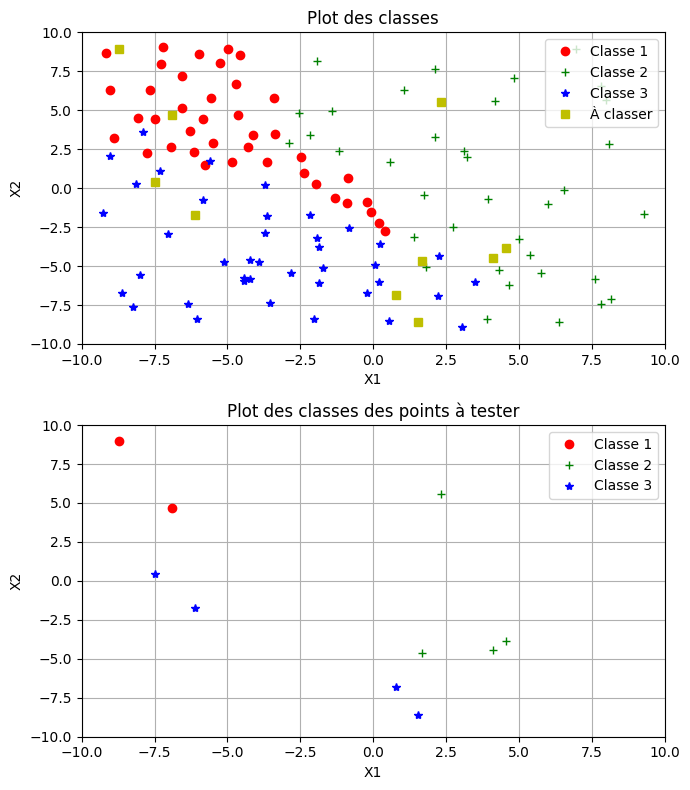

In [50]:
fig, axs = plt.subplots(2, 1, squeeze=True, tight_layout=True, figsize=(7,8))

axs[0].plot(X[X[:, 2] == 1, 0], X[X[:, 2] == 1, 1], 'or', label='Classe 1')
axs[0].plot(X[X[:, 2] == 2, 0], X[X[:, 2] == 2, 1], '+g', label='Classe 2')
axs[0].plot(X[X[:, 2] == 3, 0], X[X[:, 2] == 3, 1], '*b', label='Classe 3')
axs[0].plot(X_test[:,0], X_test[:,1], 'sy', label='À classer')
axs[0].axis([-10, 10, -10, 10])
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')
axs[0].legend()
axs[0].grid(True)
axs[0].set_title('Plot des classes')

axs[1].plot(X_test[X_test[:, 2] == 1, 0], X_test[X_test[:, 2] == 1, 1], 'or', label='Classe 1')
axs[1].plot(X_test[X_test[:, 2] == 2, 0], X_test[X_test[:, 2] == 2, 1], '+g', label='Classe 2')
axs[1].plot(X_test[X_test[:, 2] == 3, 0], X_test[X_test[:, 2] == 3, 1], '*b', label='Classe 3')
axs[1].axis([-10, 10, -10, 10])
axs[1].set_xlabel('X1')
axs[1].set_ylabel('X2')
axs[1].legend()
axs[1].grid(True)
axs[1].set_title('Plot des classes des points à tester')


plt.show()

100%|██████████| 41200/41200 [02:04<00:00, 331.62it/s]


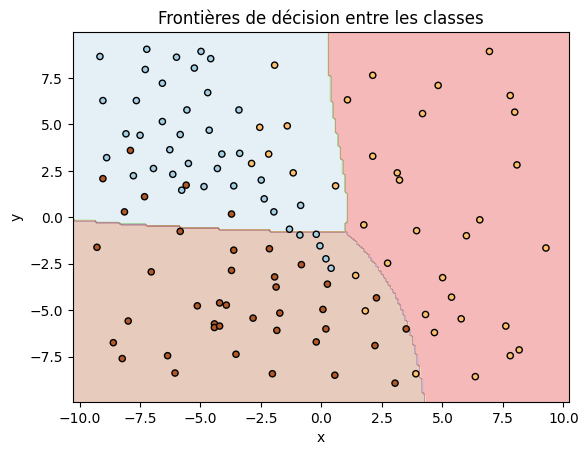

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Paramètres pour la grille
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 2  # taille de la grille

# Création de la grille
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Paramètres de la classification
N = X.shape[0]
S = np.eye(2) * h**2 
m = [0, 0]

n1 = X[X[:, 2] == 1].shape[0]
n2 = X[X[:, 2] == 2].shape[0]
n3 = X[X[:, 2] == 3].shape[0]

pw1 = n1 / N
pw2 = n2 / N
pw3 = n3 / N

X1 = X[X[:, 2] == 1]
X2 = X[X[:, 2] == 2]
X3 = X[X[:, 2] == 3]

# Classification des points de la grille
Z = []
for x_test in tqdm(grid_points):
    pf1, pf2, pf3 = 0, 0, 0

    for i in range(X1.shape[0]):
        pf1 += gaussienne((x_test[0] - X1[i, 0]) / h, (x_test[1] - X1[i, 1]) / h, m, S)
    for i in range(X2.shape[0]):
        pf2 += gaussienne((x_test[0] - X2[i, 0]) / h, (x_test[1] - X2[i, 1]) / h, m, S)
    for i in range(X3.shape[0]):
        pf3 += gaussienne((x_test[0] - X3[i, 0]) / h, (x_test[1] - X3[i, 1]) / h, m, S)

    pf1 = (1 / (N * h**2)) * pf1
    pf2 = (1 / (N * h**2)) * pf2
    pf3 = (1 / (N * h**2)) * pf3

    g1_x = pw1 * pf1
    g2_x = pw2 * pf2
    g3_x = pw3 * pf3

    # Ajoute la classe prédite pour chaque point de la grille
    Z.append(1 + np.argmax([g1_x, g2_x, g3_x]))

# Conversion en matrice pour affichage
Z = np.array(Z).reshape(xx.shape)

# Affichage des frontières de décision
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)

# Affichage des points de X
plt.scatter(X[:, 0], X[:, 1], c=X[:, 2], cmap=plt.cm.Paired, edgecolor='k', s=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Frontières de décision entre les classes")
plt.show()
